# PTU Step Response Test 07-10-2018
### Hang Test frame with ebay PTU placed on ground
### IMU mounted on top/center of PTU
### 6 runs were performed with different PTU speeds 
    run0: 1 pos/sec or 0.006 deg/sec
    run1: 10 pos/sec or 0.06 deg/sec
    run2: 50 pos/sec or 0.12 deg/sec
    run3: 100 pos/sec or 0.6 deg/sec
    run4; 200 pos/sec or 1.2 deg/sec
    run5: 400 pos/sec or 2.4 deg/sec

### The PTU speeds were chosen to span the range of expected balloon velocities in flight
### On each run, PTU initially at rest and at t t=2 seconds, the PTU commanded to desired velocity
### 2 plots are shown for each run (1. entire step response and 2. zoomed in on 500ms range of time)
### Run 3 at 0.6 deg/sec may be approximately the speed we are considering for the science scan speed and it doesn't really seem to be close to a constant velocity.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
cwd = os.getcwd()

In [2]:
#Set plot settings
import matplotlib as mpl
################################################################################
base_size=20
mpl.rcParams['legend.fontsize'] = base_size
mpl.rcParams['figure.figsize'] = (30,24)
mpl.rcParams['figure.titlesize']=base_size+5
mpl.rcParams['xtick.labelsize']=base_size
mpl.rcParams['ytick.labelsize']=base_size
mpl.rcParams['font.size']=base_size
mpl.rcParams['axes.titlesize']=base_size
mpl.rcParams['axes.labelsize']=base_size
mpl.rcParams['lines.markersize'] = 10           # markersize, in points
mpl.rcParams['legend.markerscale'] = 1     # line width in points
mpl.rcParams['lines.markeredgewidth'] = 0.4 # the line width around the marker symbol
mpl.rcParams['lines.linewidth'] = 4
#####################################

In [3]:
#Load step response data
data_locs = glob(cwd +'/*.csv')
data = {}
test_vels=[]
for file in data_locs:
    test_vel=file.split('.csv')[0].split('_vel_')[-1]
    test_vels.append(test_vel)
    data[test_vel] = pd.read_csv(file)
    hz=1./data[test_vel].elapsed.diff().mean()
    t0=0
    t1=data[test_vel].elapsed[0]

In [4]:
#Compute the average velocites after the step response settles out
#Looks like imu scaling factor is ~14
imu2deg_sec=14
mask_settle = data['1'].elapsed > 2.5
for run in test_vels:
    data['settle_vel_'+str(run)] = data[str(run)].loc[mask_settle,'imu_ang_z'].mean()
data['settle_ratios']=[data['settle_vel_400']/data['settle_vel_1'],
                        data['settle_vel_400']/data['settle_vel_200']*200,
                        data['settle_vel_400']/data['settle_vel_100']*100,
                        data['settle_vel_400']/data['settle_vel_50']*50,
                        data['settle_vel_400']/data['settle_vel_10']*10,
                        data['settle_vel_400']/data['settle_vel_1']*1]   

In [5]:
#Compute scaling factor to get from IMU velocity reading to deg/sec
data['settle_vel_act']=[]
data['deg_per_sec_cmd']=[]
data['deg_per_sec_scale']=[]
for i in range(len(test_vels)):
    data['settle_vel_act'].append(int(test_vels[i]))
    data['deg_per_sec_cmd'].append(.006*int(test_vels[i]))
    data['deg_per_sec_scale'].append(data['deg_per_sec_cmd'][-1]/data['settle_vel_'+test_vels[i]])

Text(0,0.5,'IMU measurement (deg/sec)')

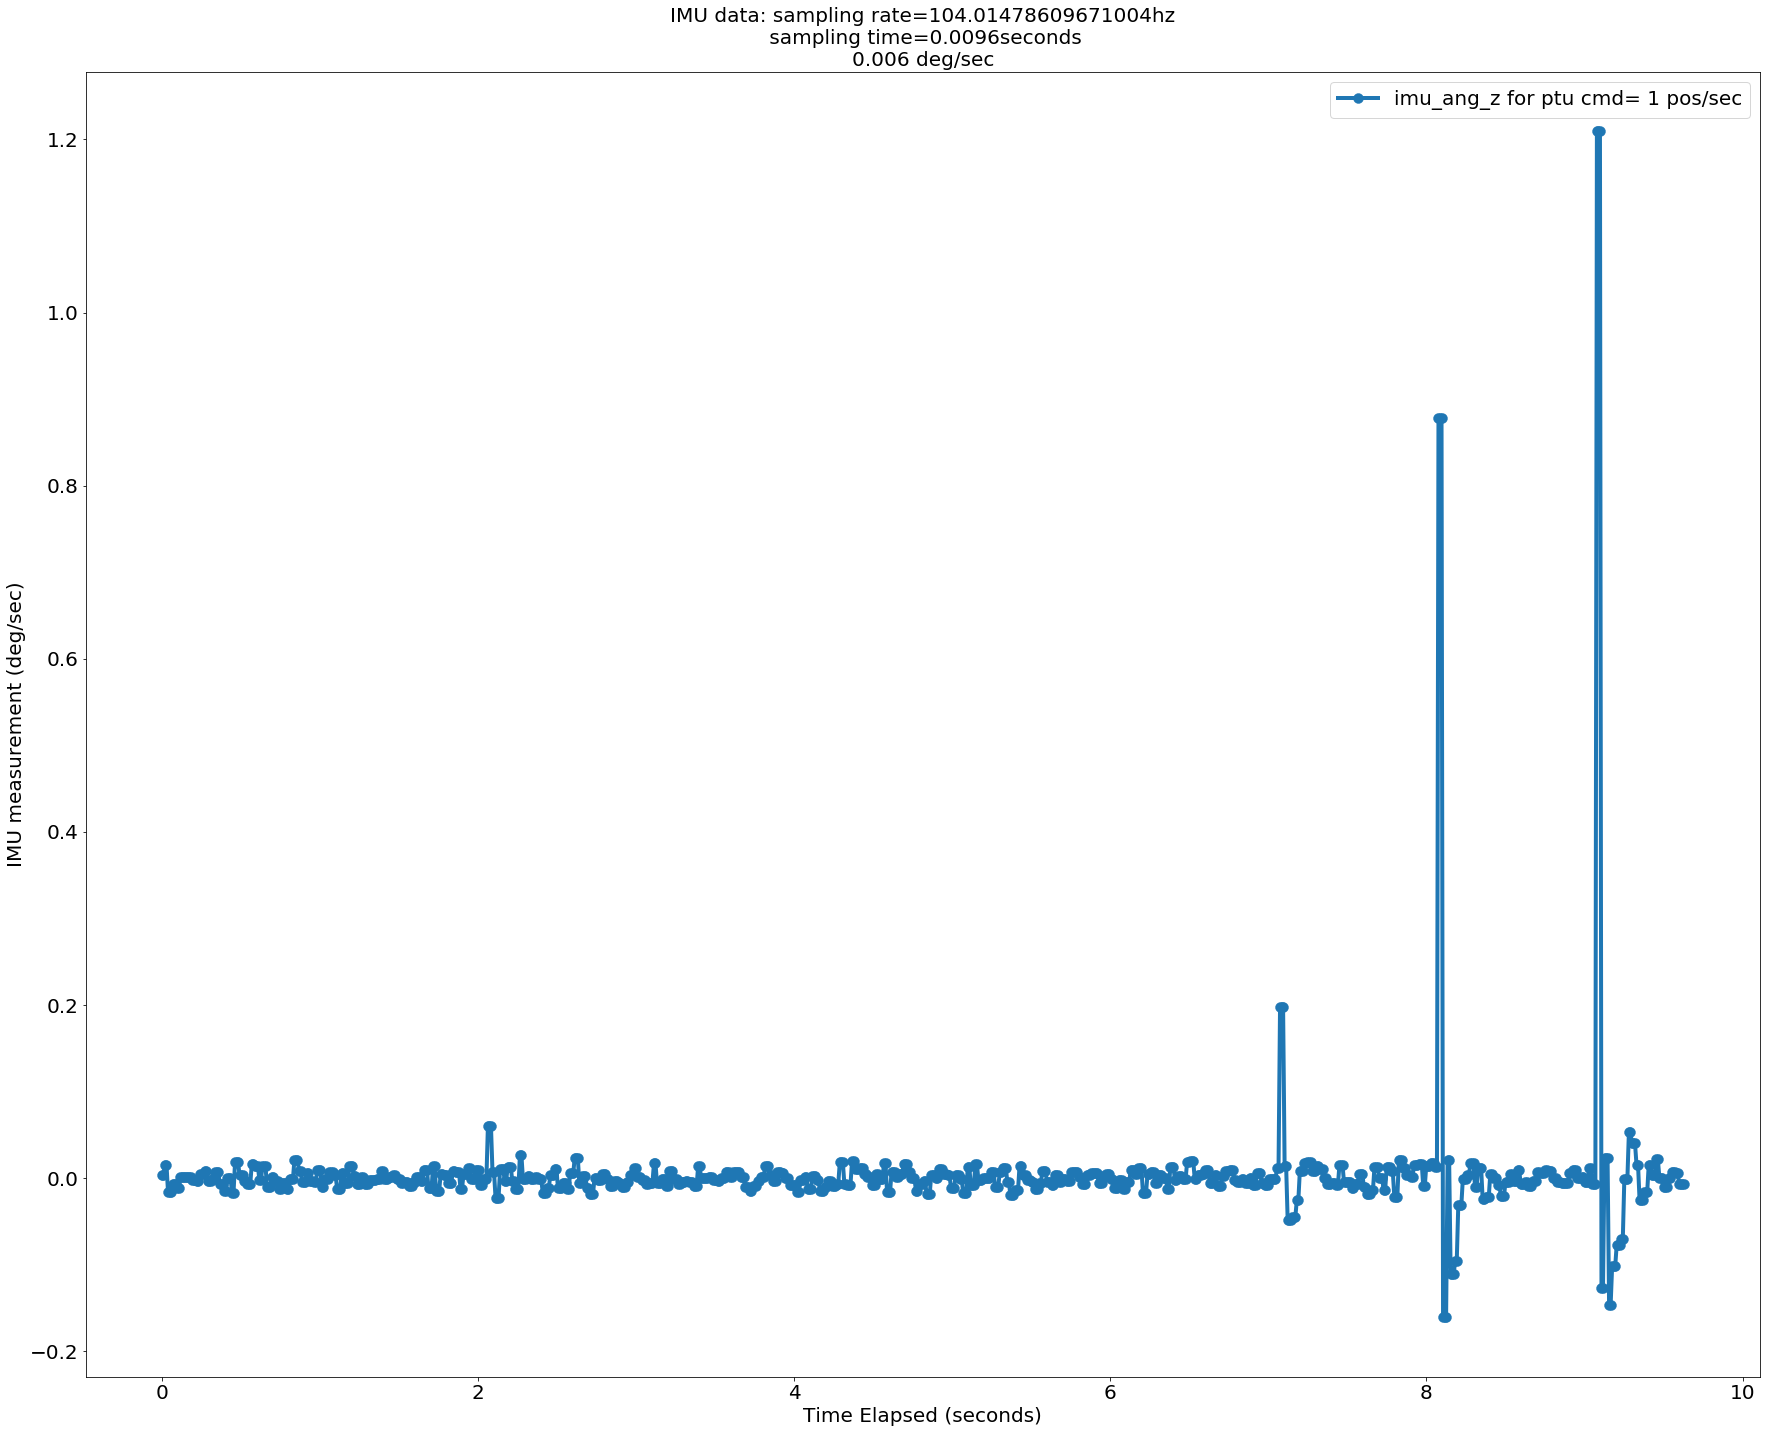

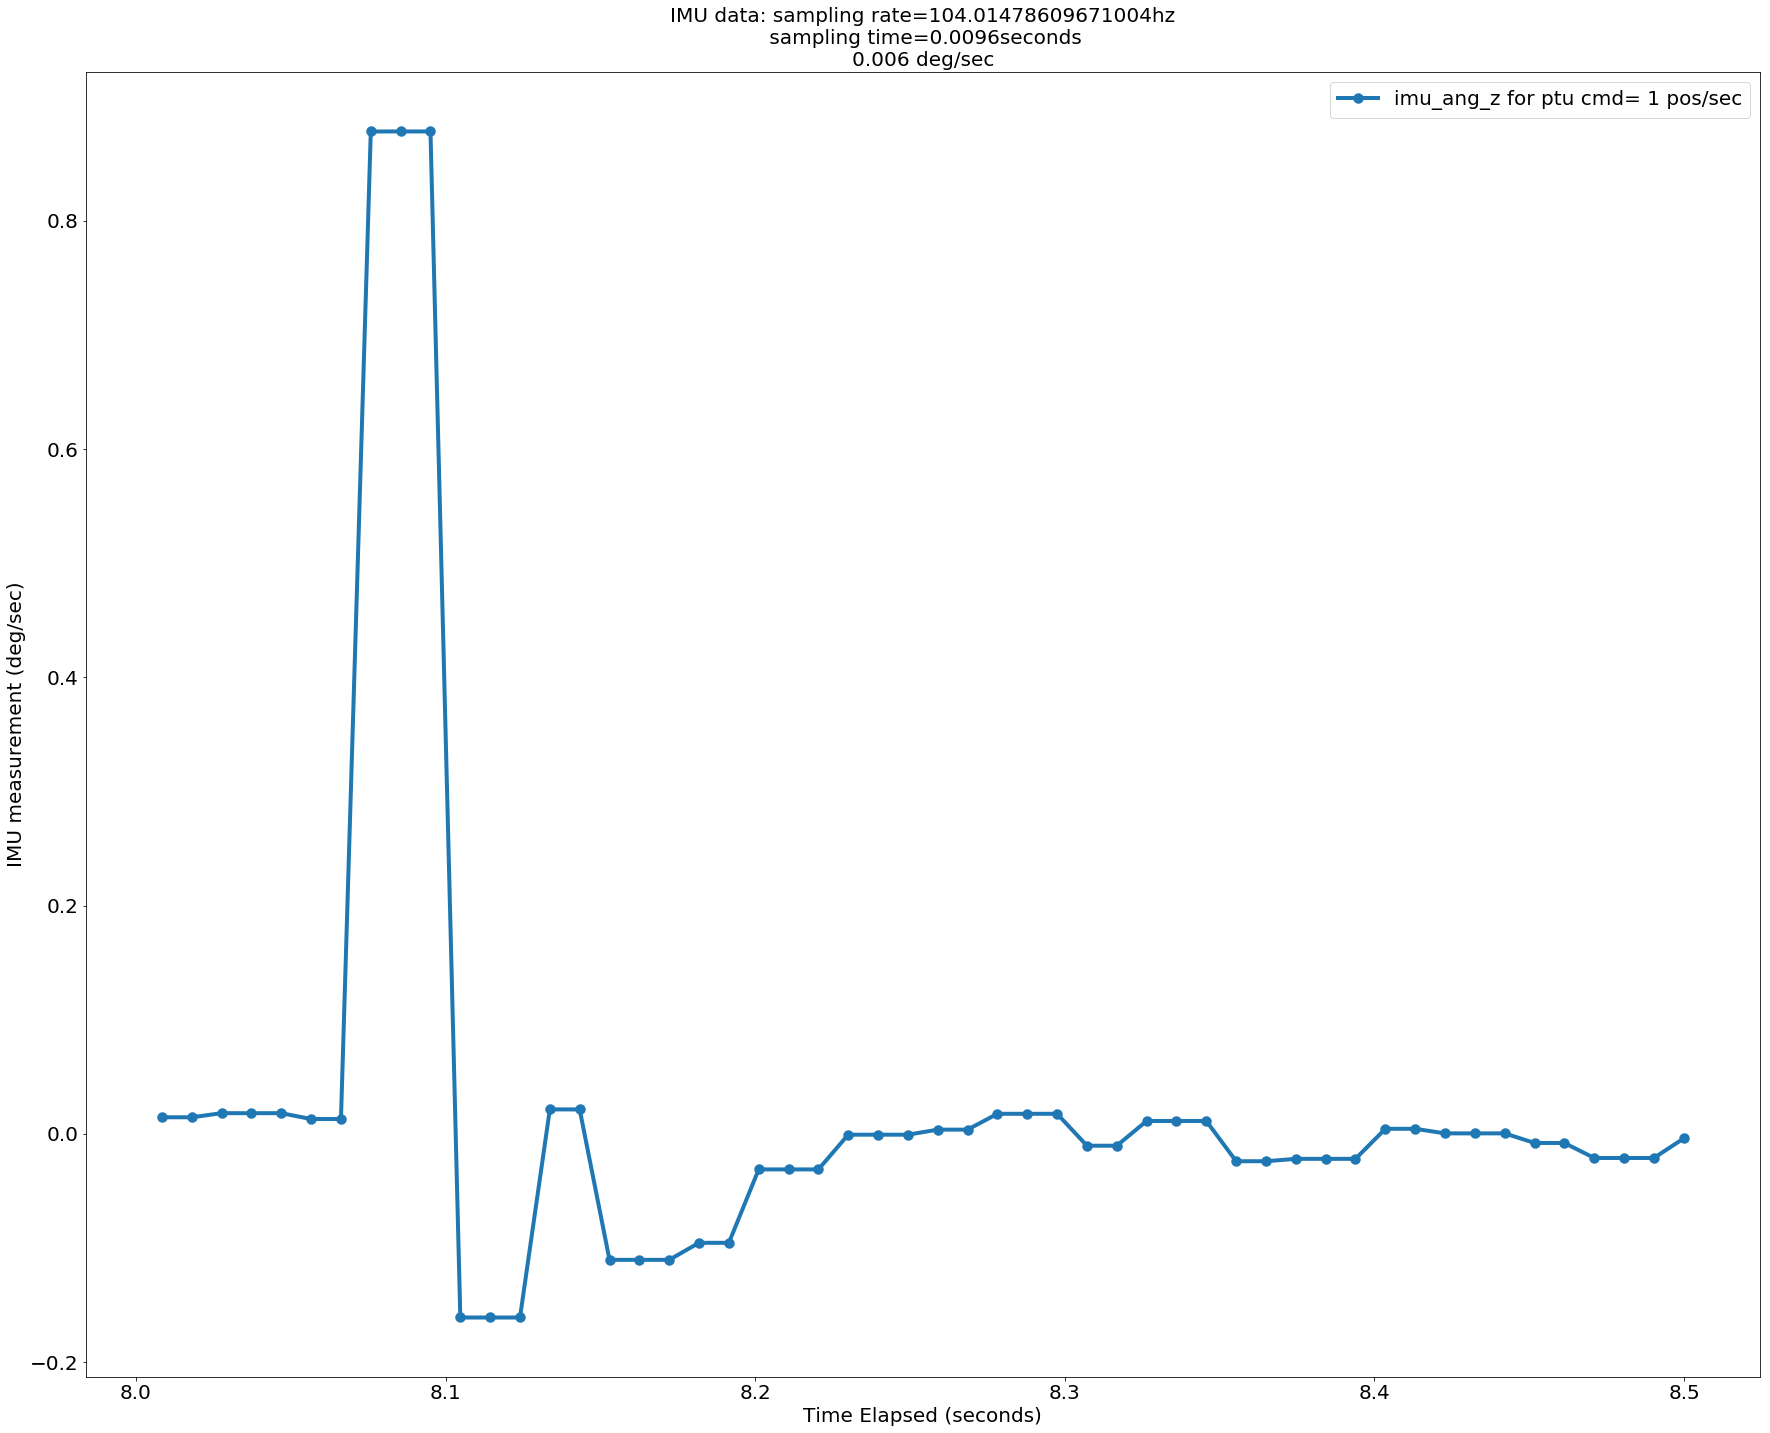

In [6]:
#Plot step response for PTU command=1 pos/sec (0.006deg/sec)
plt.figure()
run='1'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][0])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='1'
mask = (data[run]['elapsed'] > 8) & (data[run]['elapsed'] < 8.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][0])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

Text(0,0.5,'IMU measurement (deg/sec)')

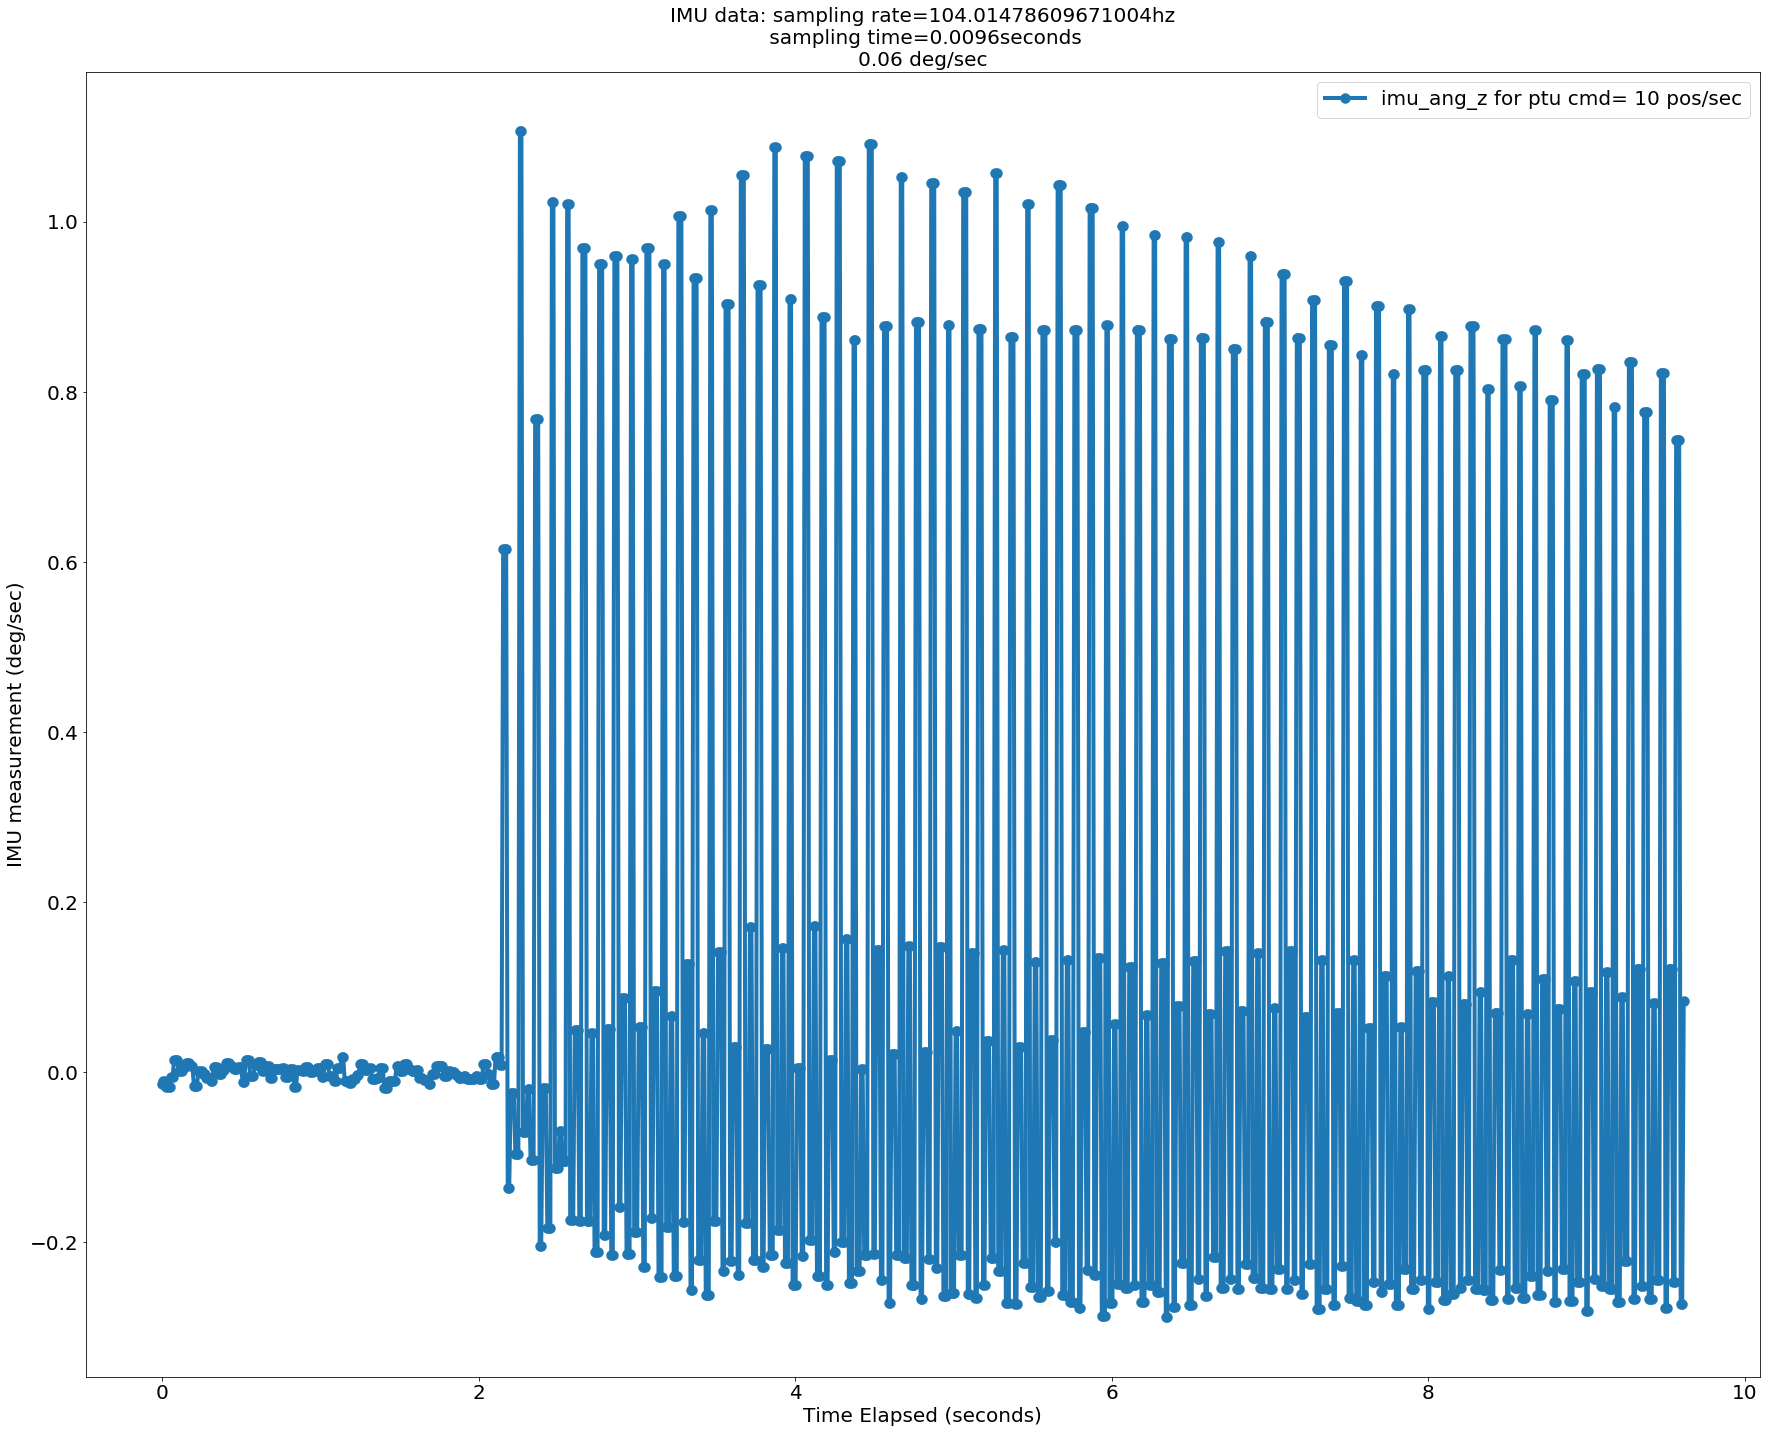

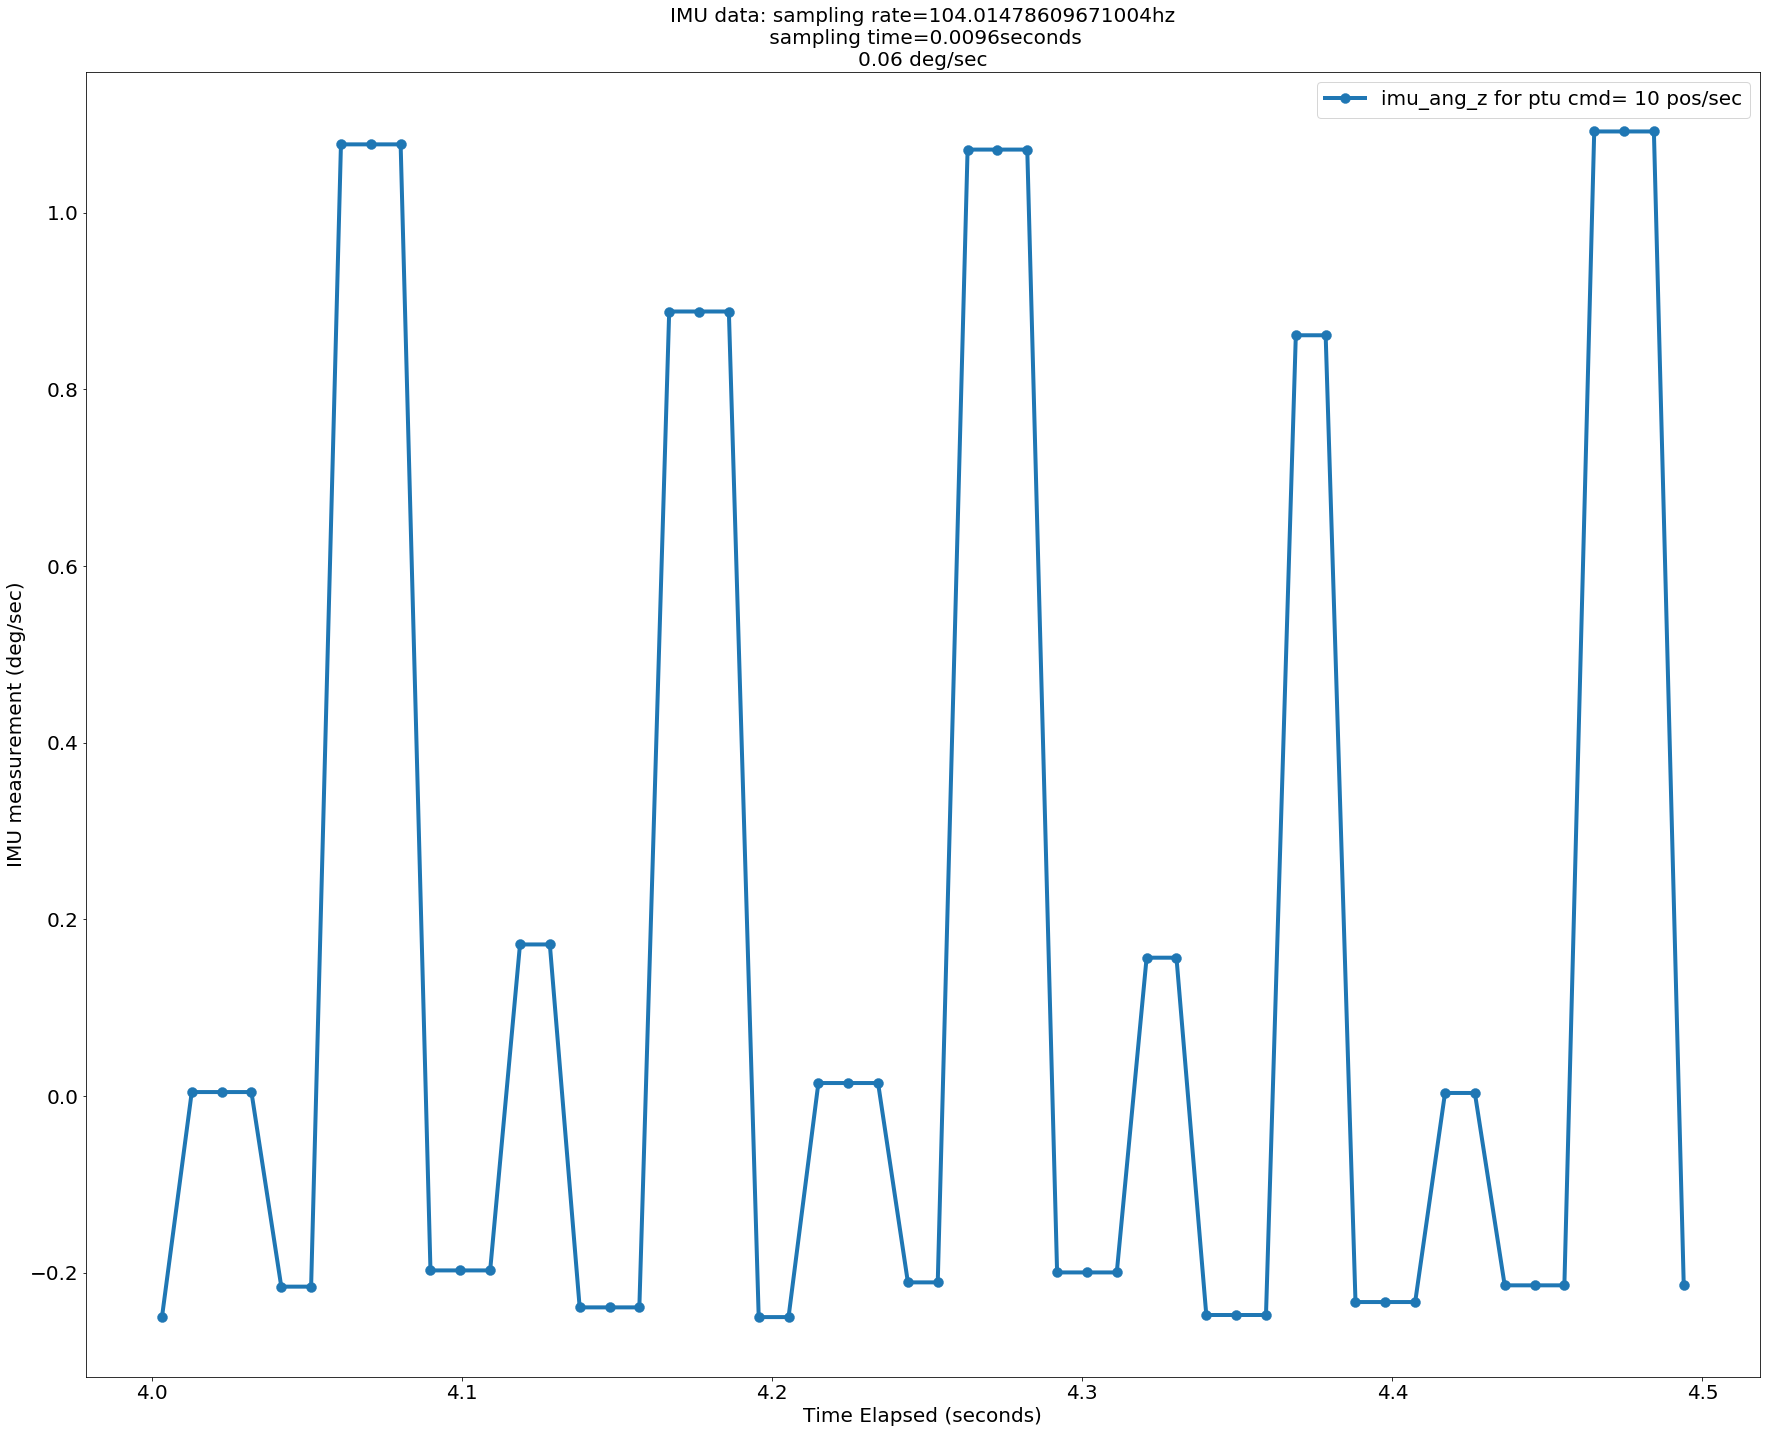

In [7]:
#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='10'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][1])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='10'
mask = (data[run]['elapsed'] > 4) & (data[run]['elapsed'] < 4.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][1])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

Text(0,0.5,'IMU measurement (deg/sec)')

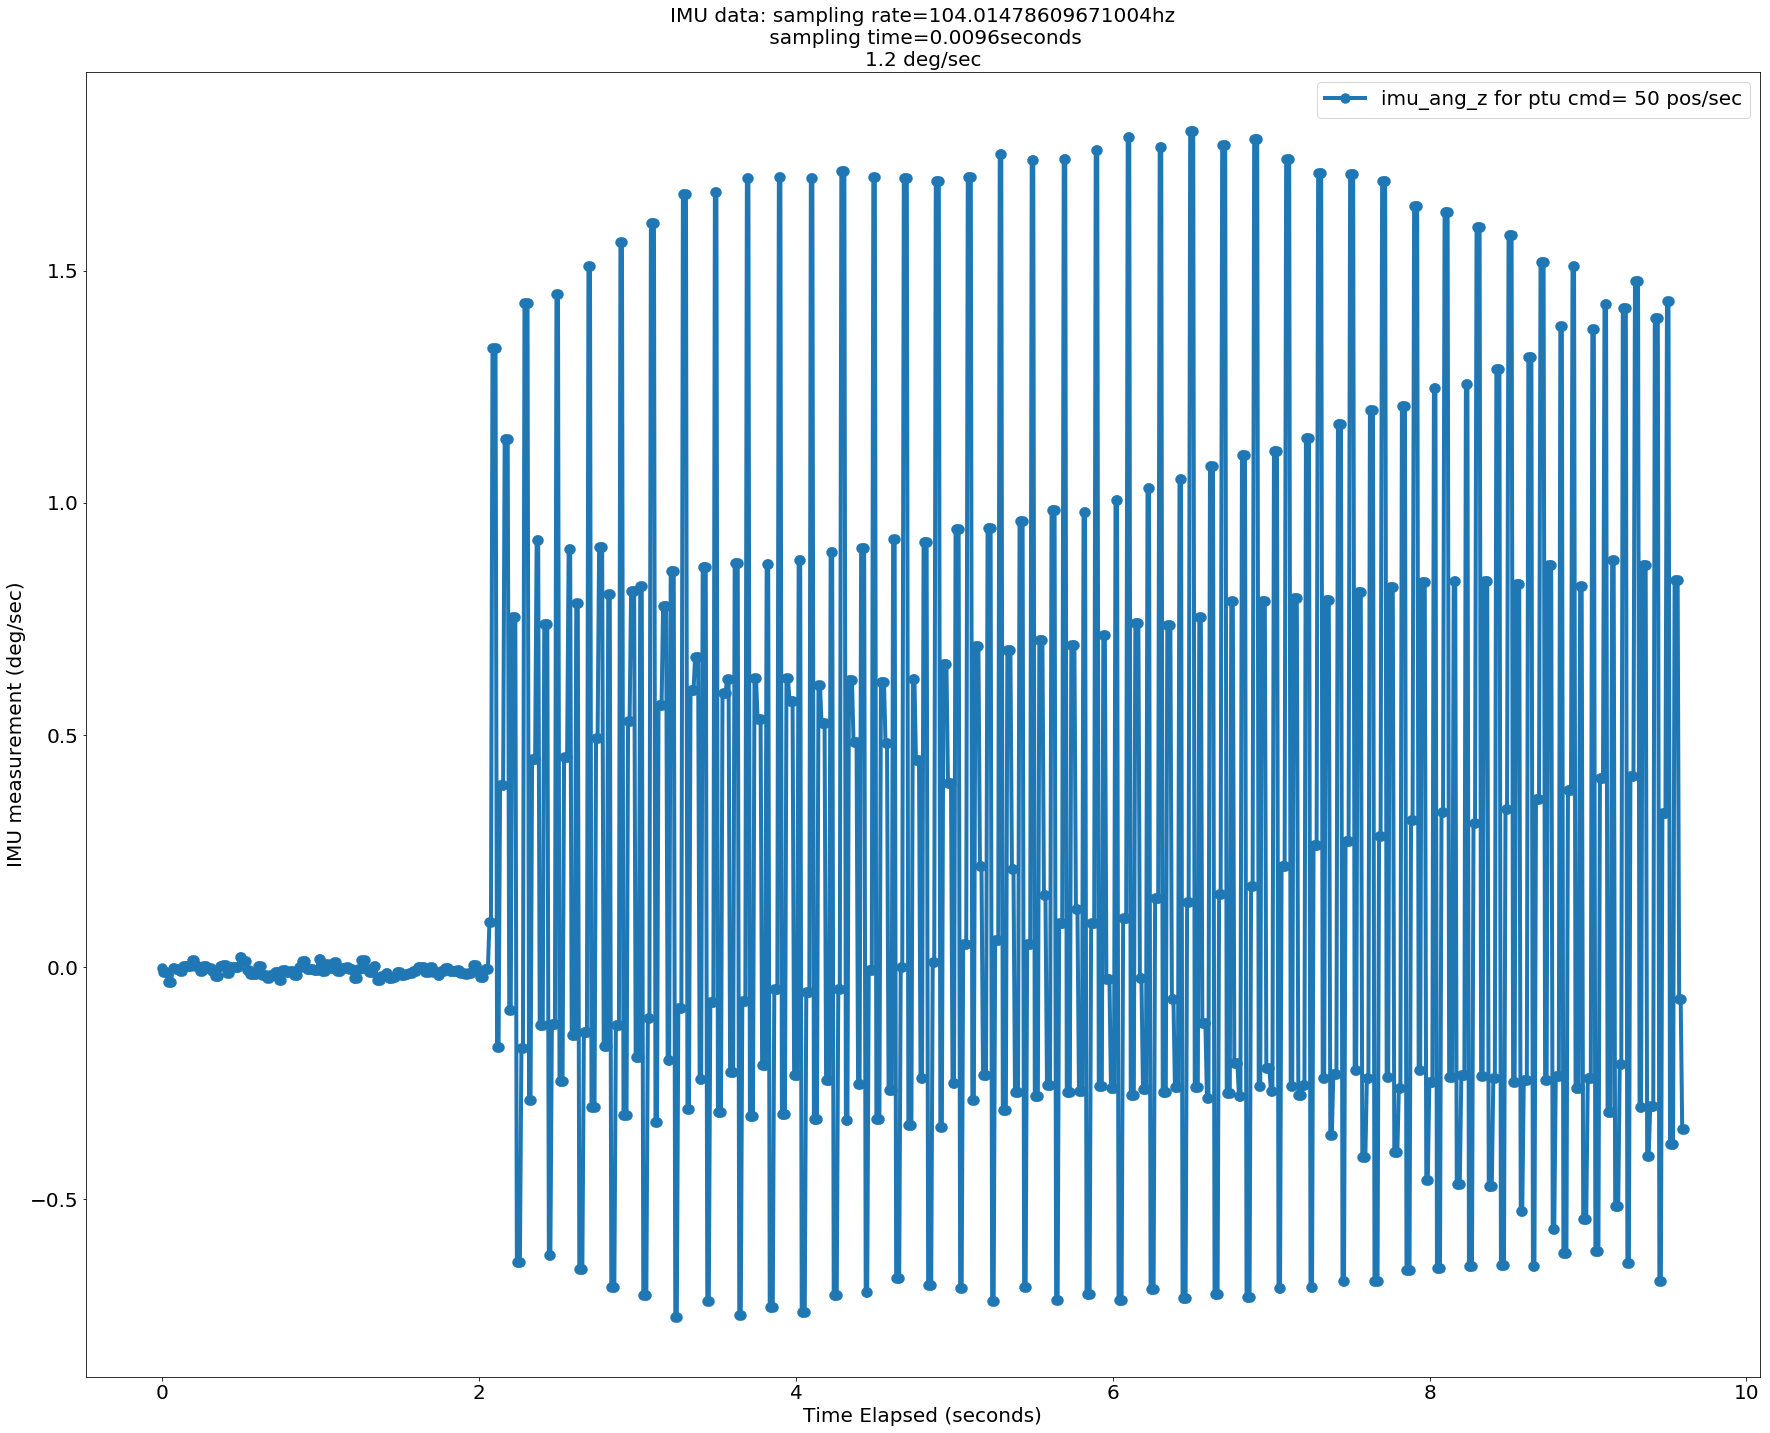

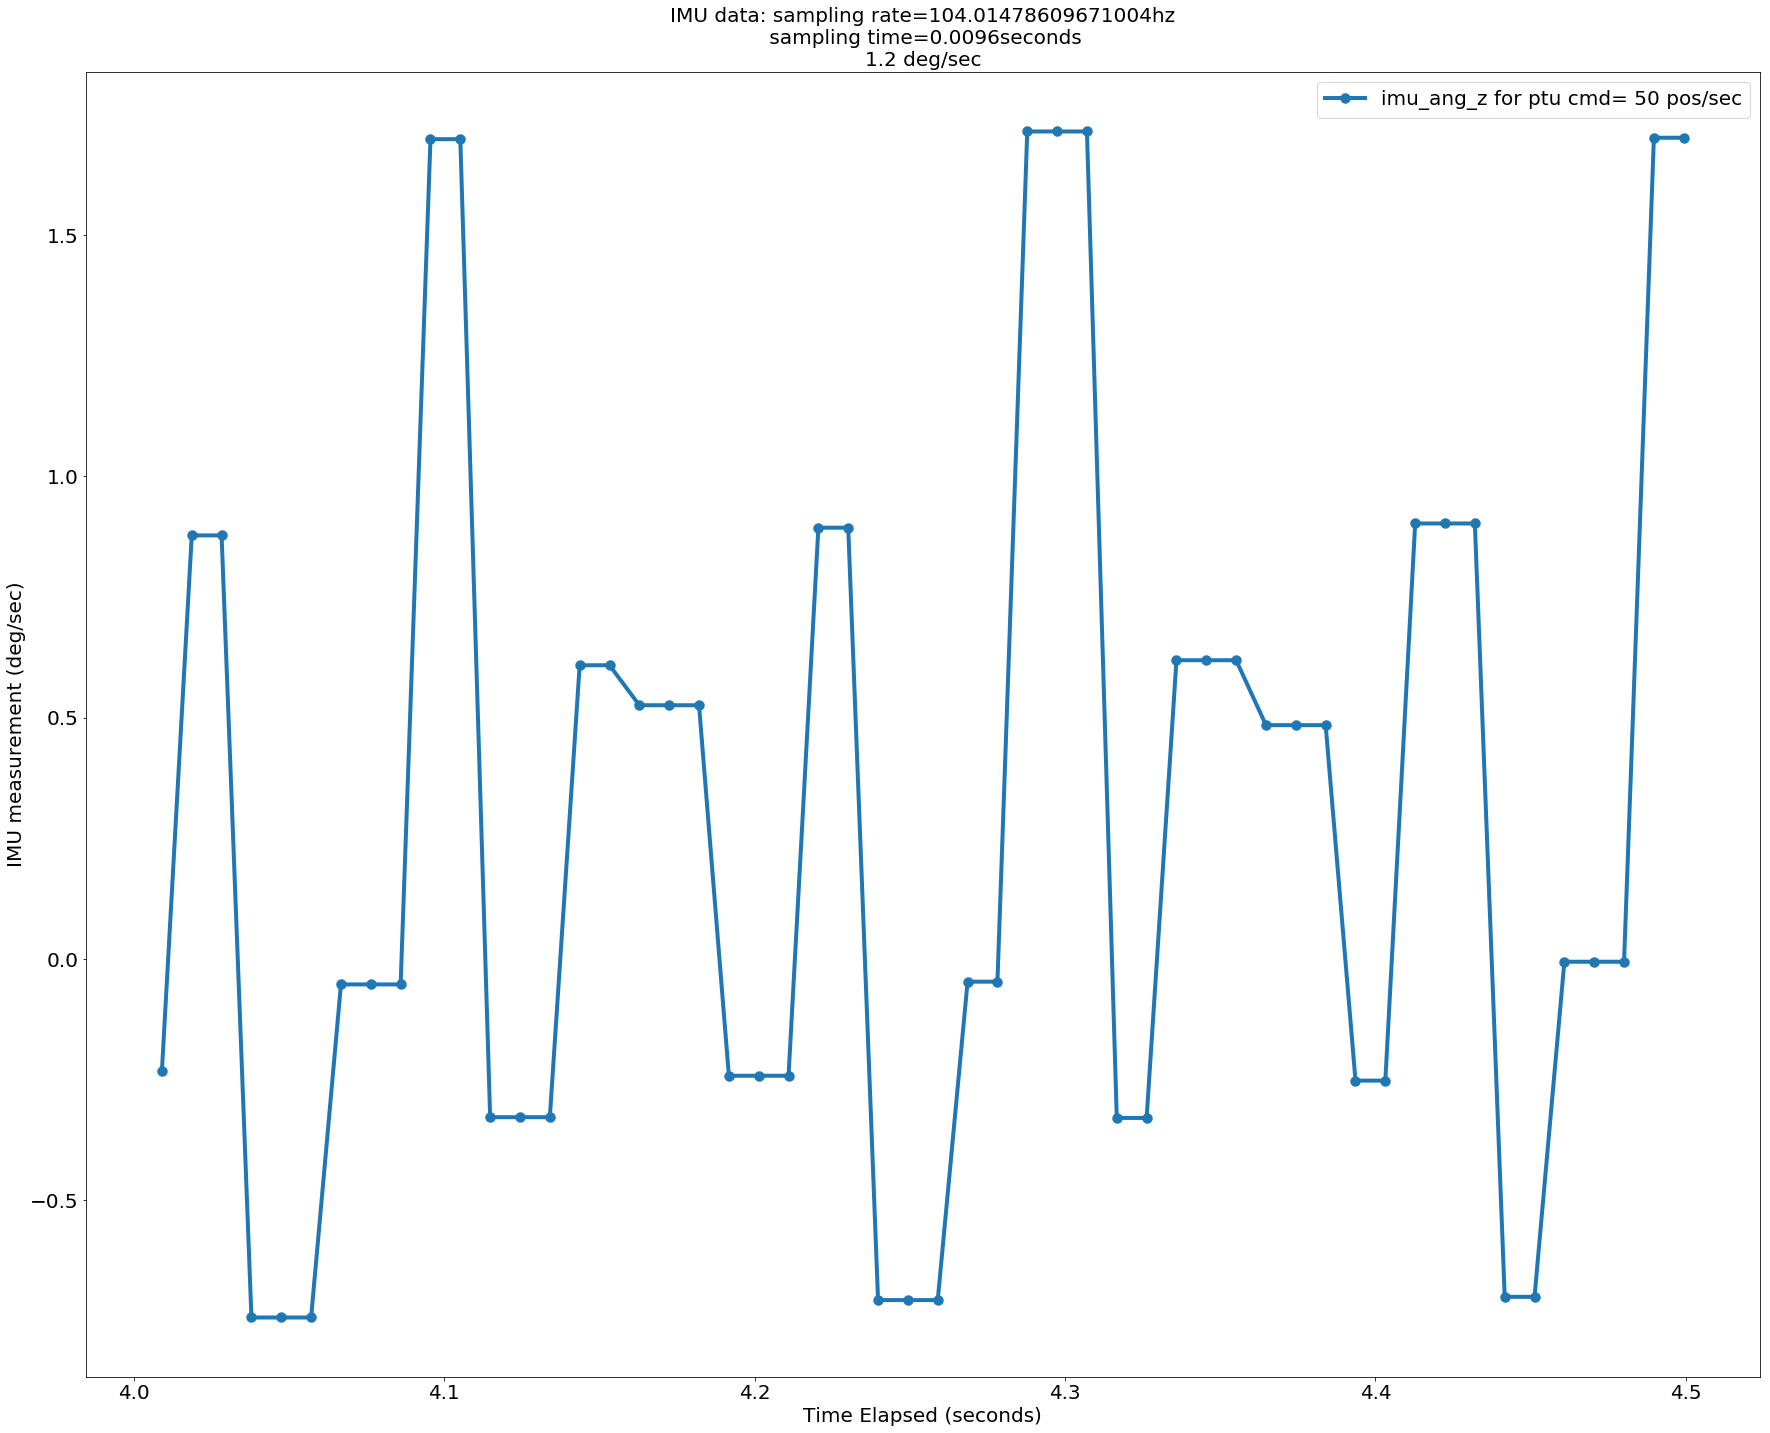

In [8]:
#Plot step response for PTU command=50 pos/sec (0.12deg/sec)
plt.figure()
run='50'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][3])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='50'
mask = (data[run]['elapsed'] > 4) & (data[run]['elapsed'] < 4.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][3])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

Text(0,0.5,'IMU measurement (deg/sec)')

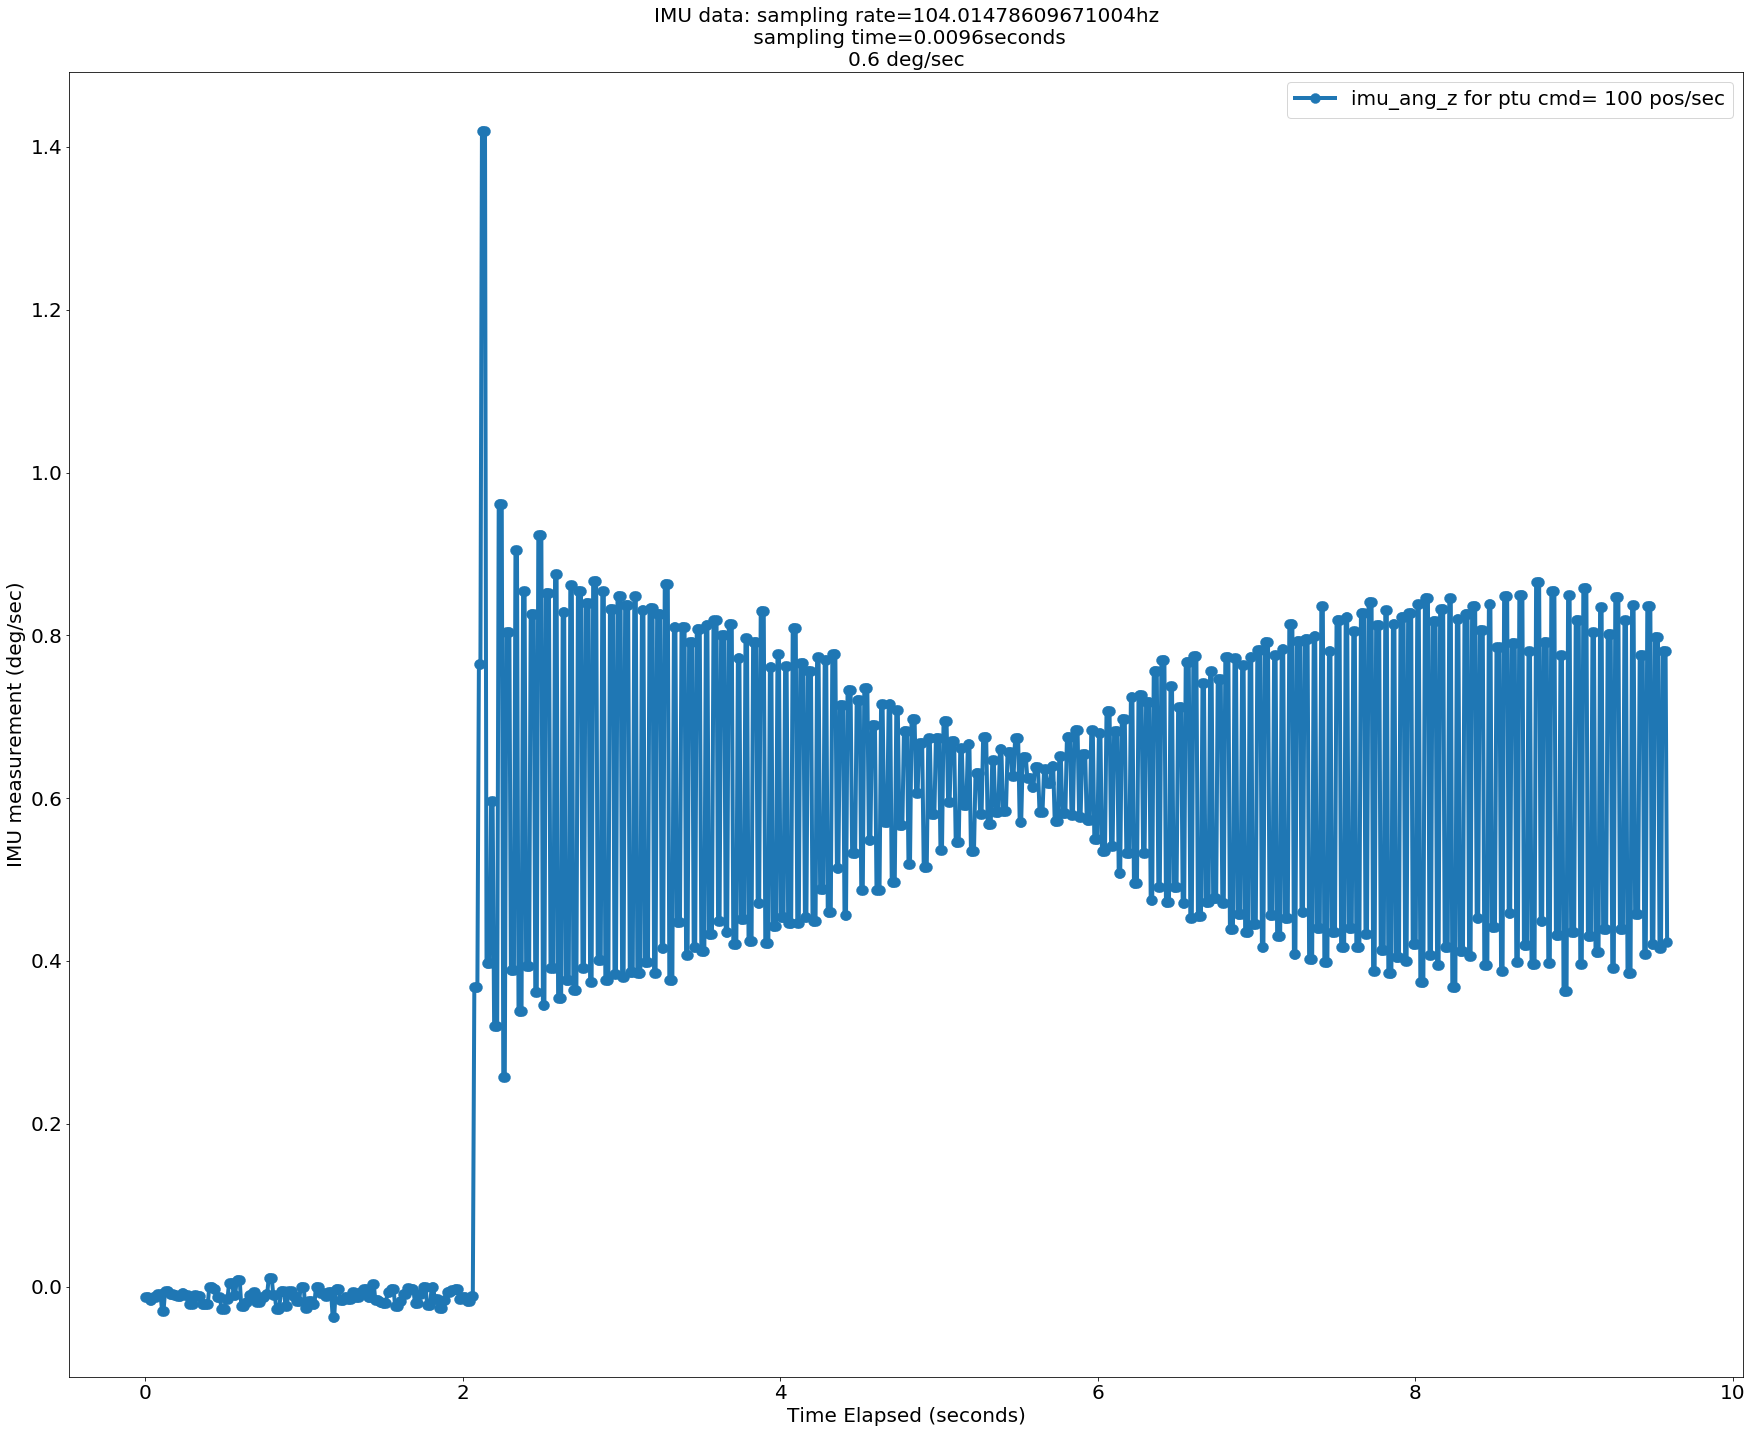

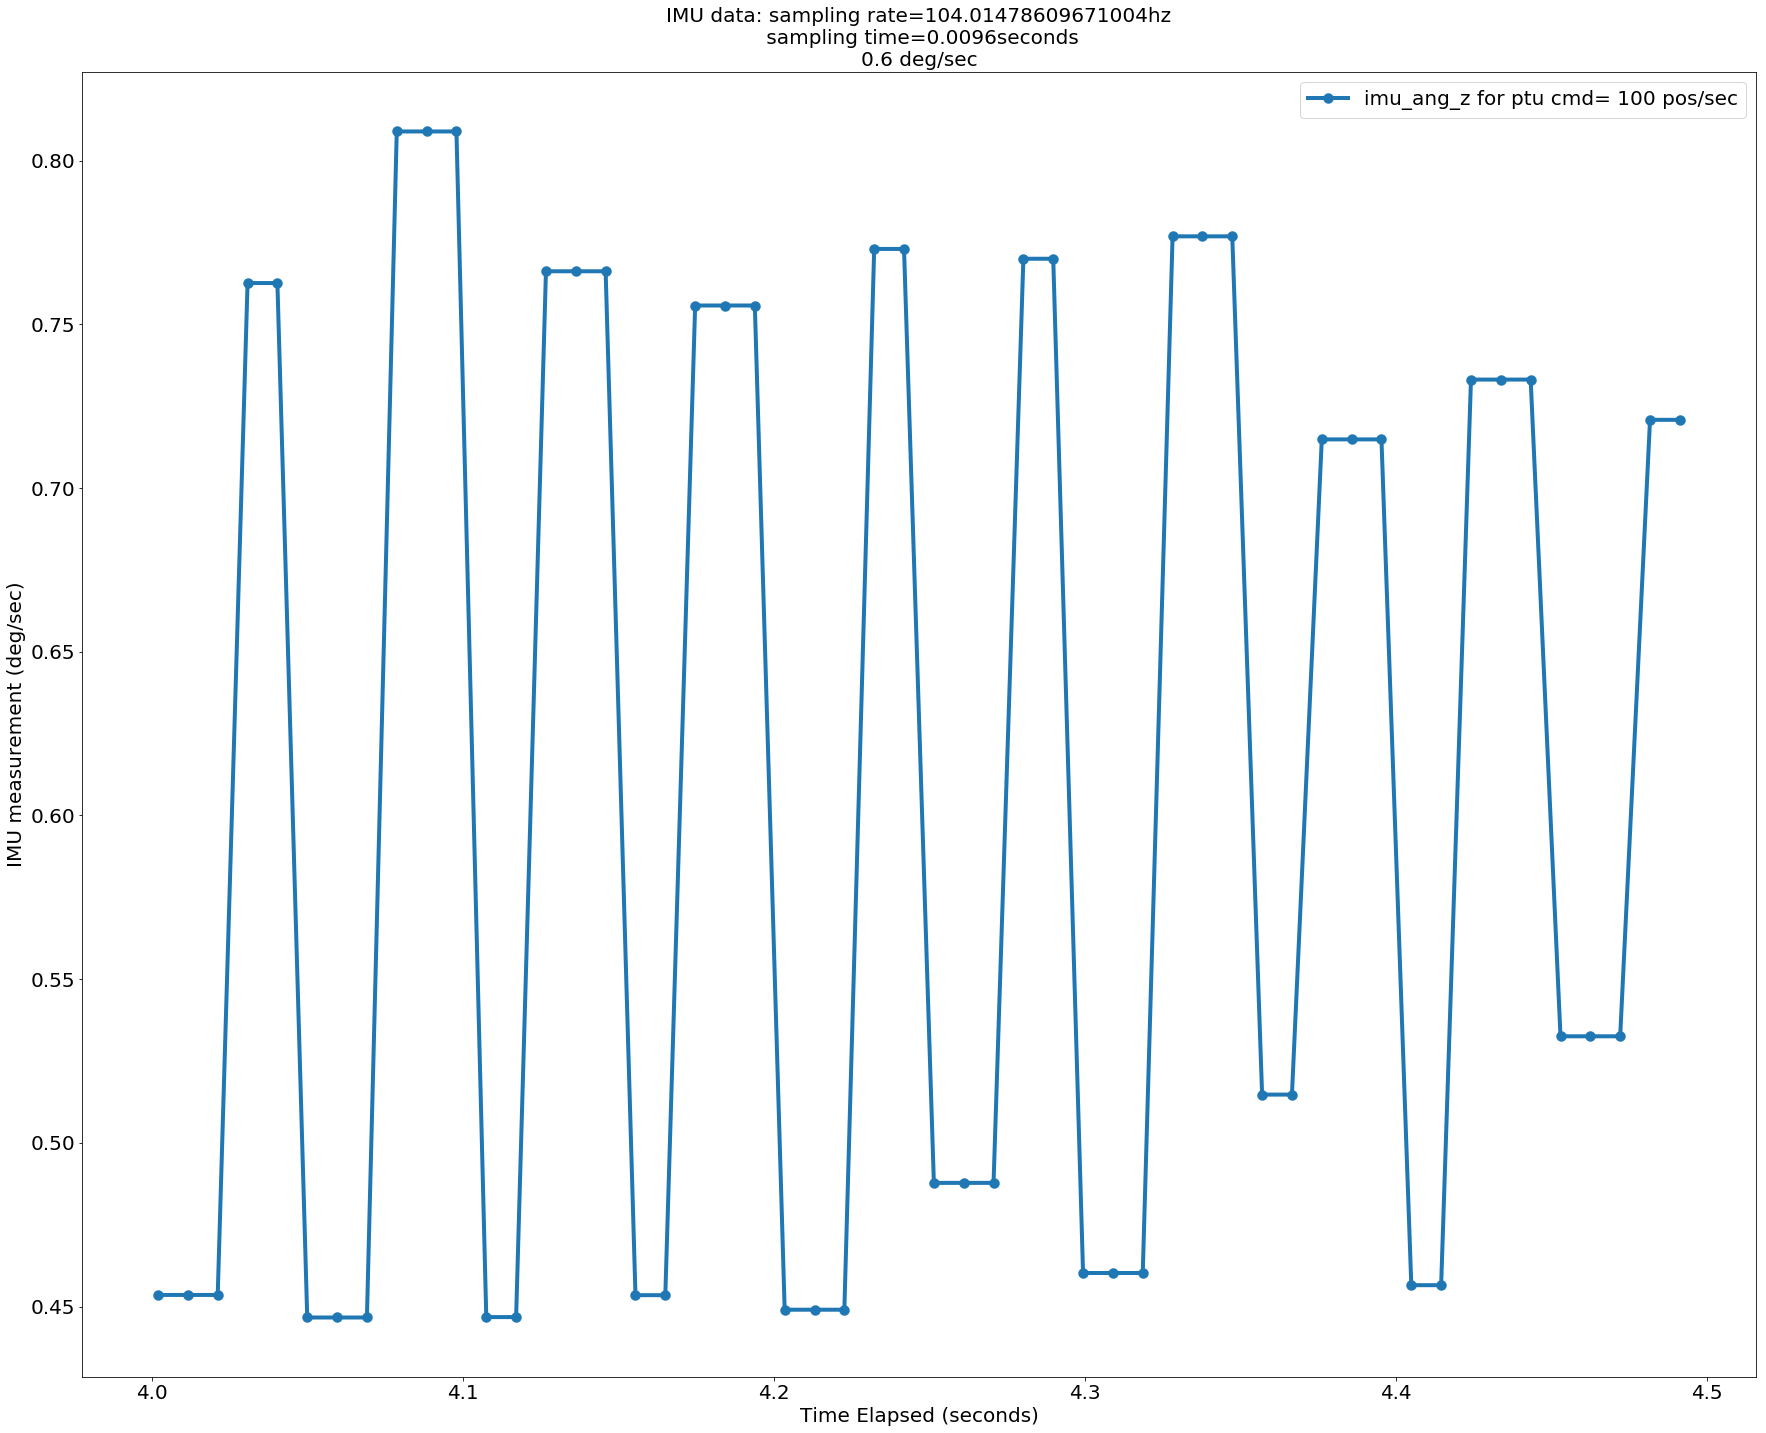

In [9]:
#Plot step response for PTU command=100 pos/sec (0.6deg/sec)
plt.figure()
run='100'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][2])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='100'
mask = (data[run]['elapsed'] > 4) & (data[run]['elapsed'] < 4.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][2])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

Text(0,0.5,'IMU measurement (deg/sec)')

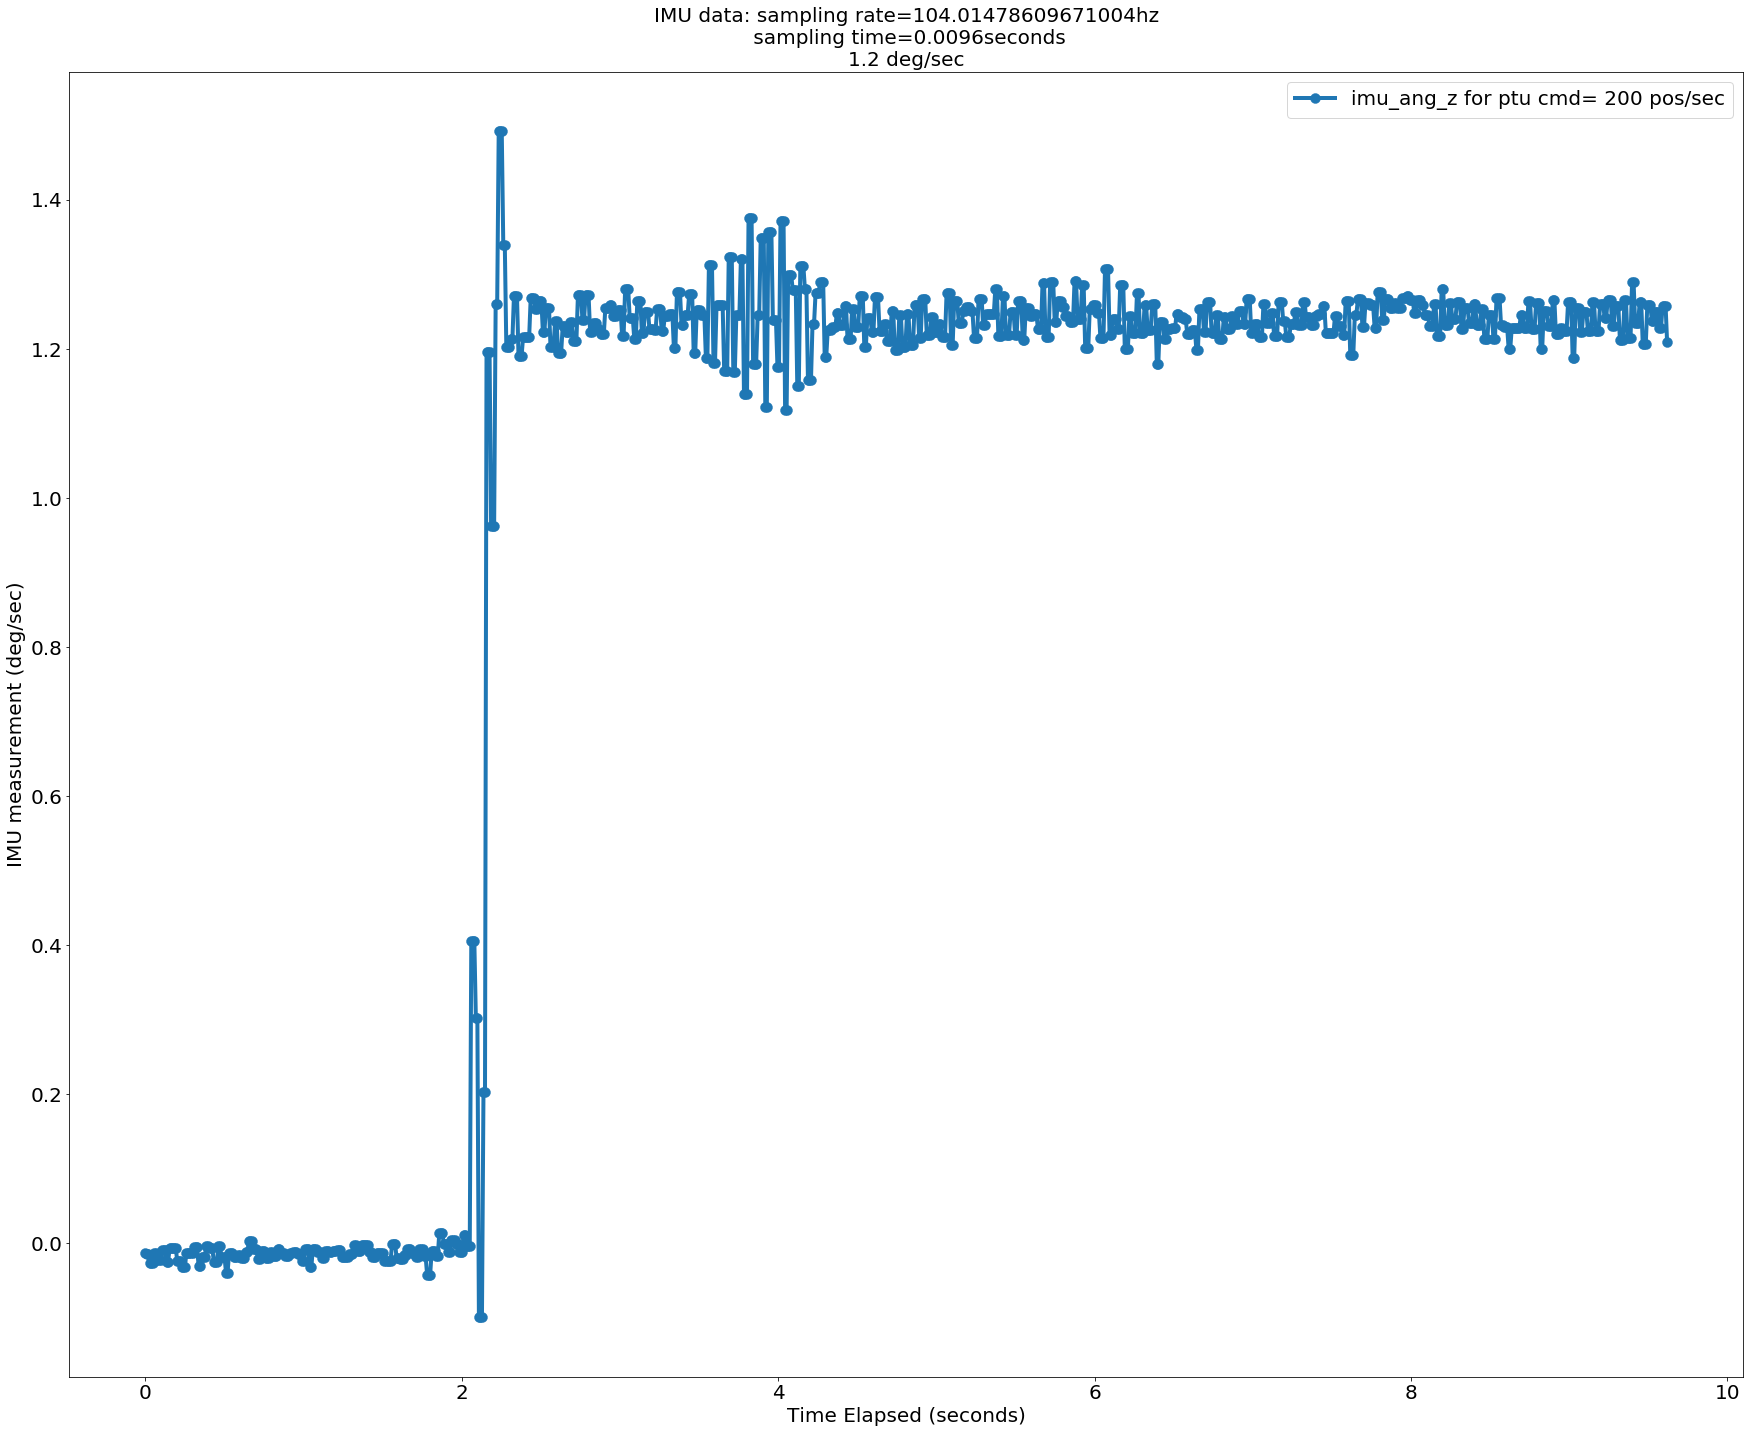

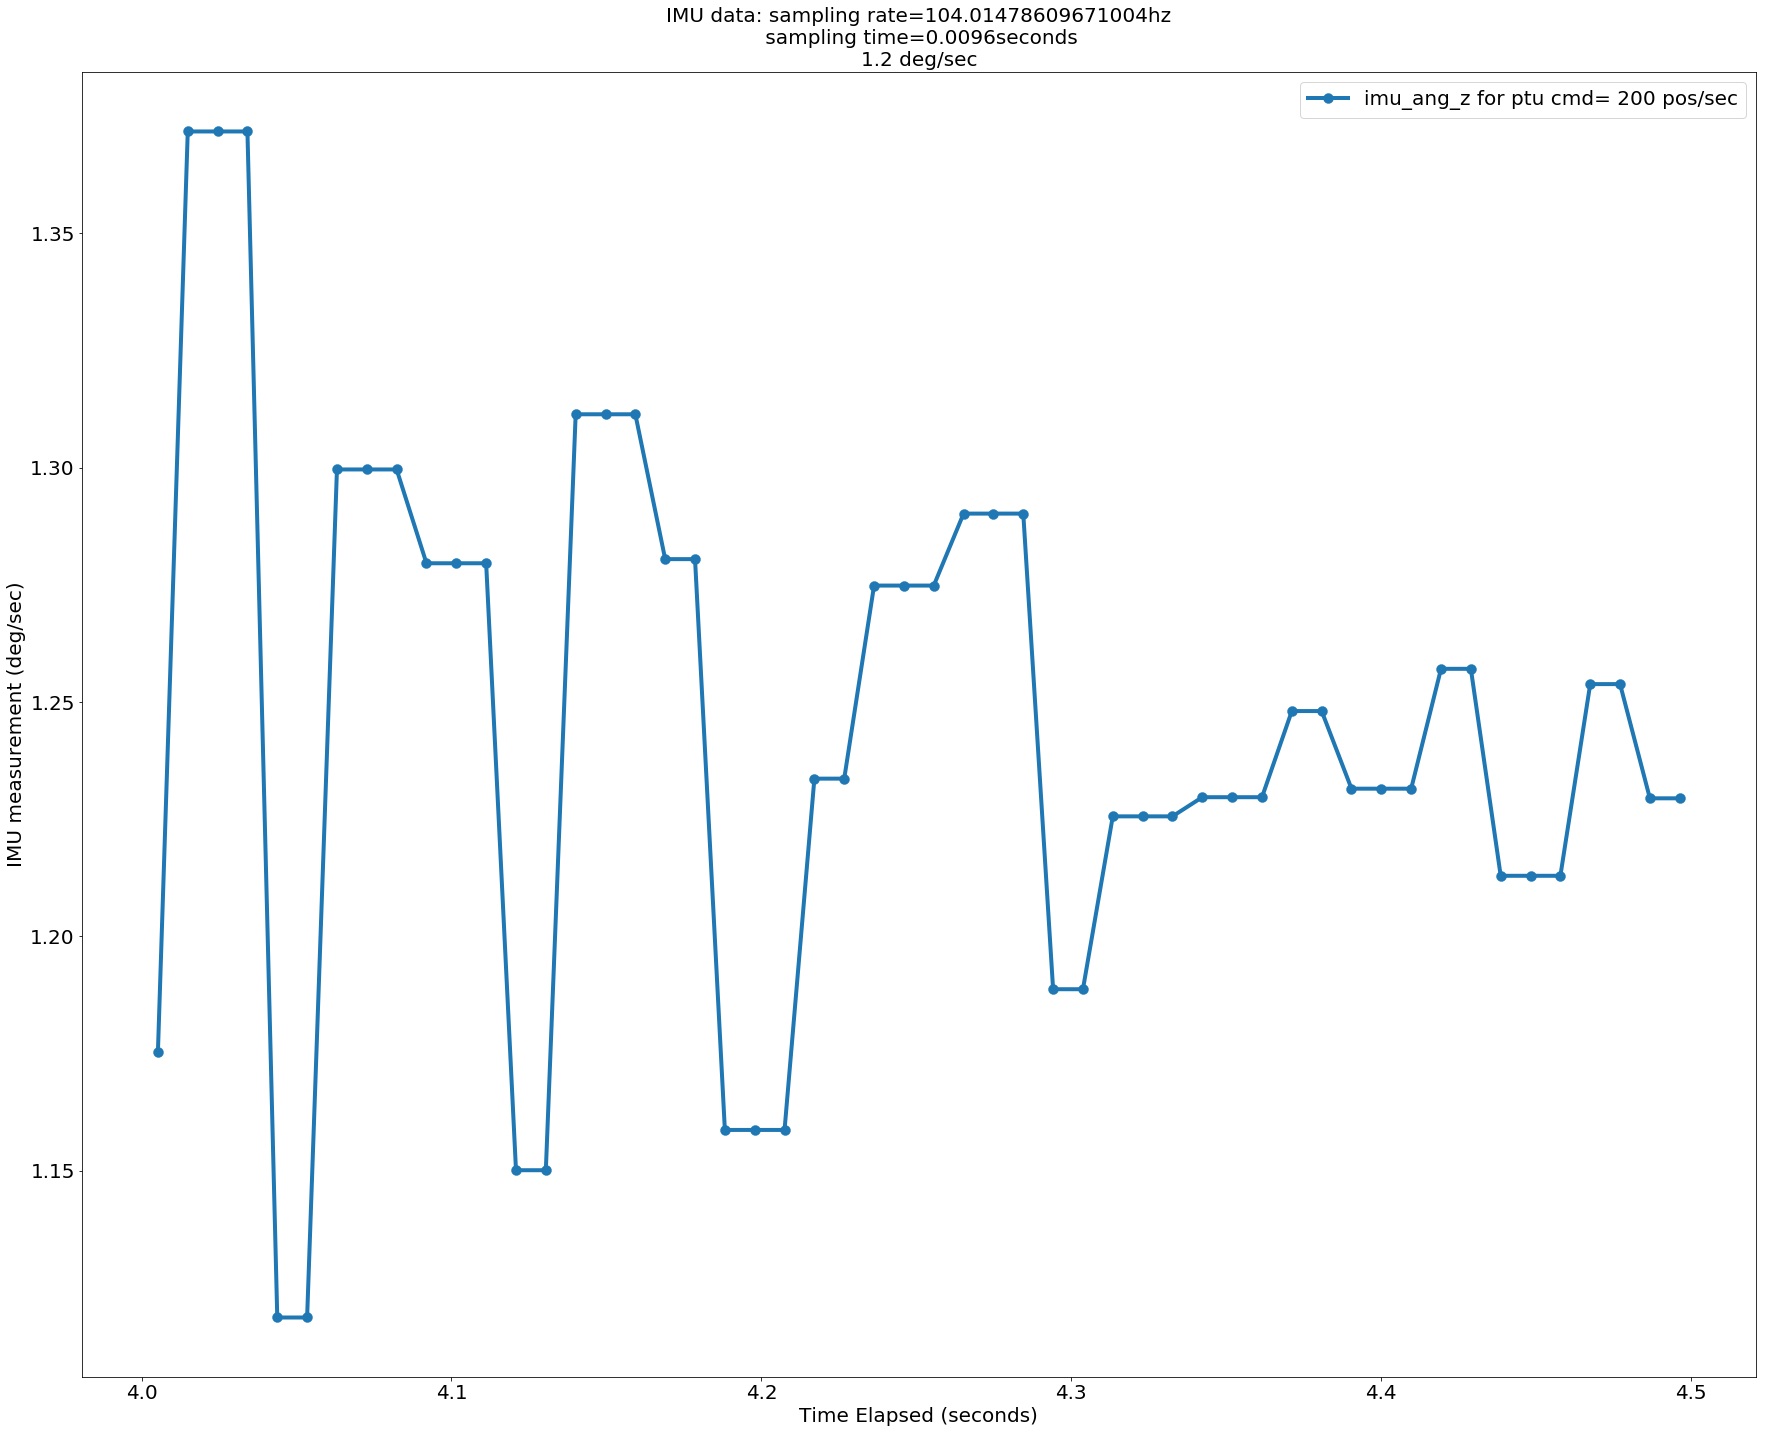

In [10]:
#Plot step response for PTU command=1pos/sec (1.2deg/sec)
plt.figure()
run='200'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][3])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='200'
mask = (data[run]['elapsed'] > 4) & (data[run]['elapsed'] < 4.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][3])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

Text(0,0.5,'IMU measurement (deg/sec)')

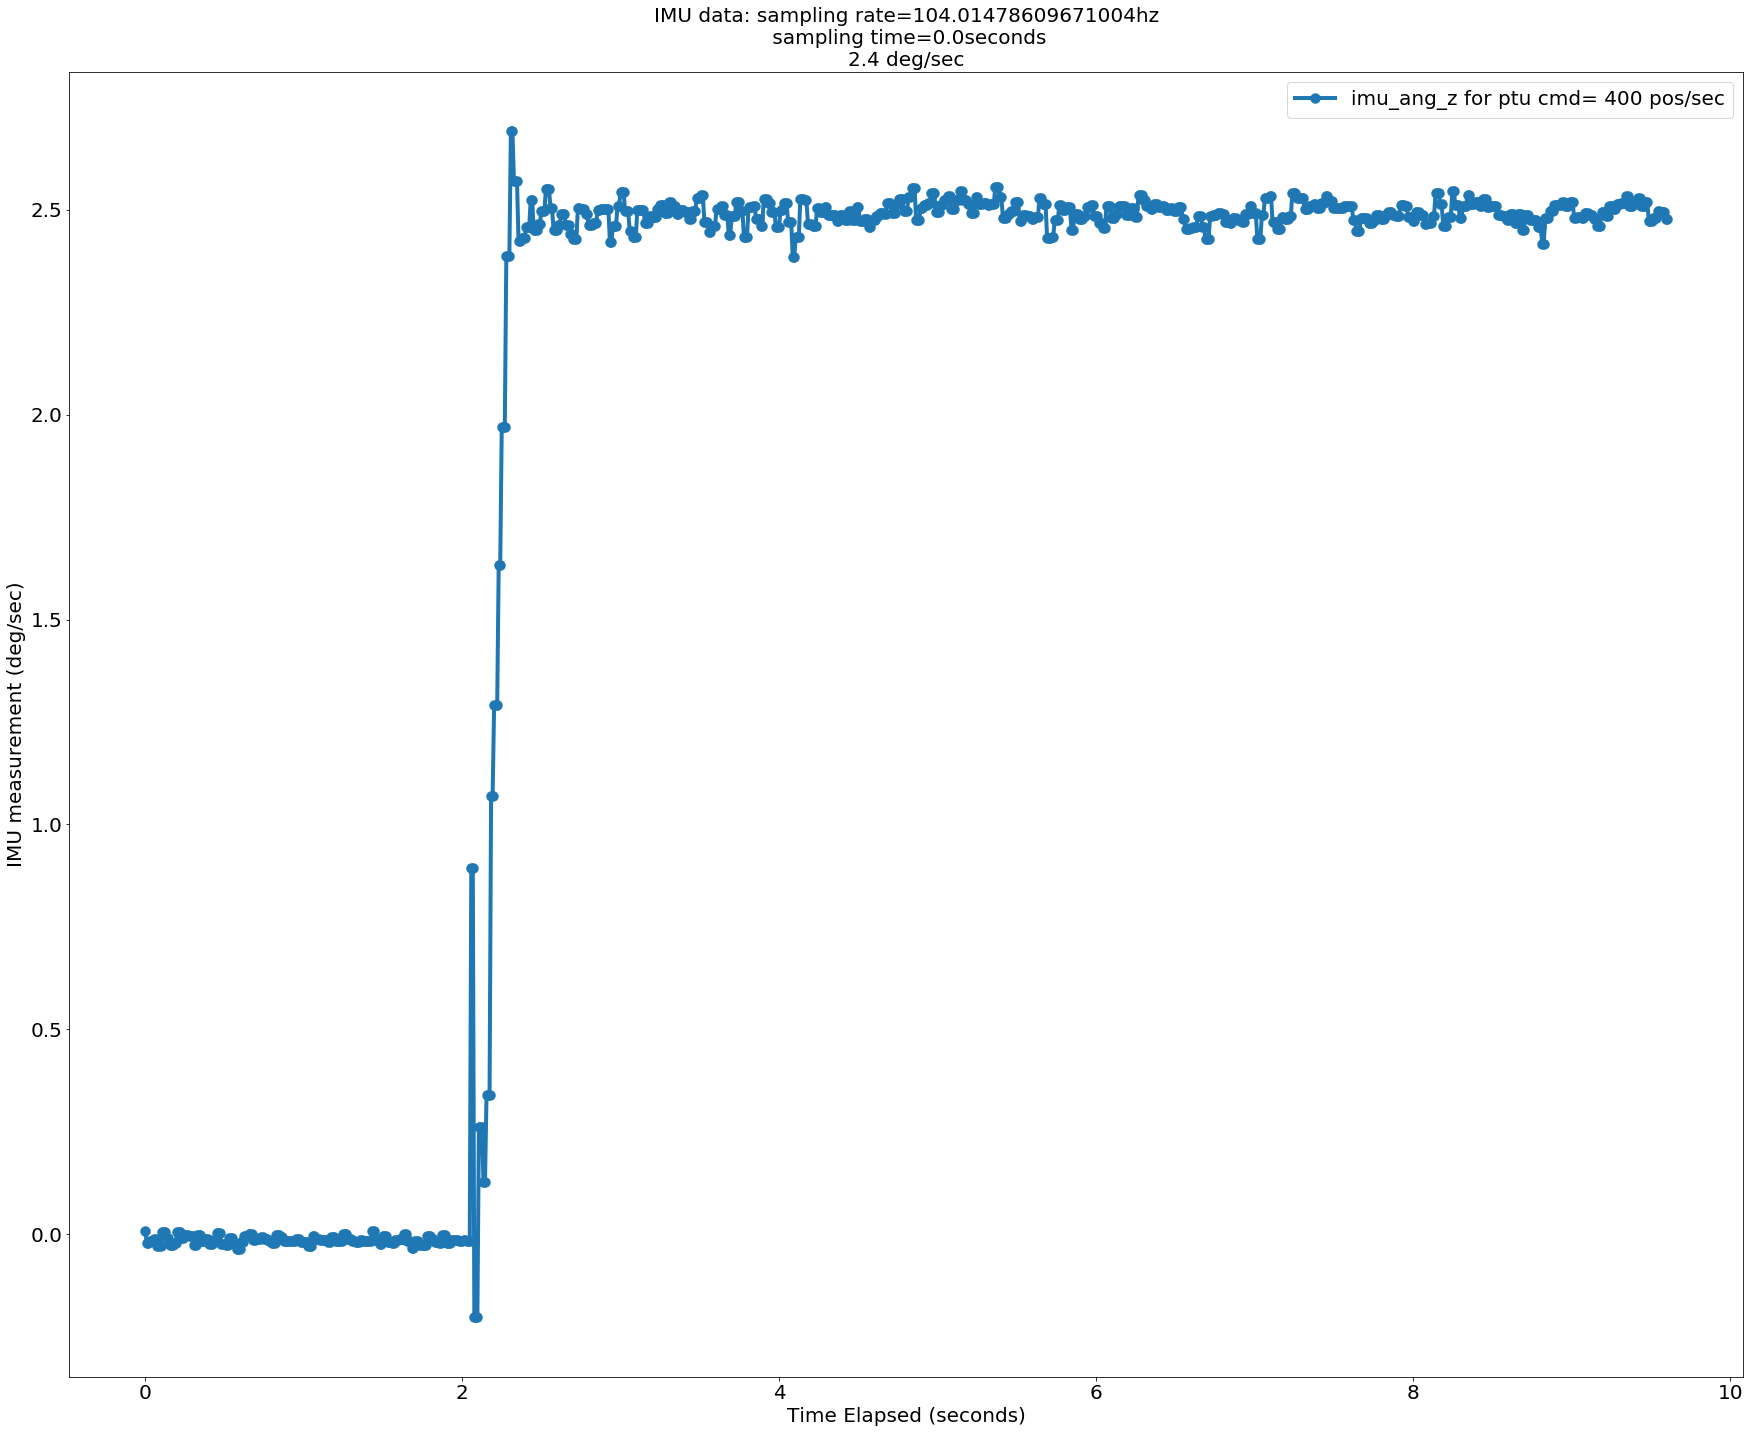

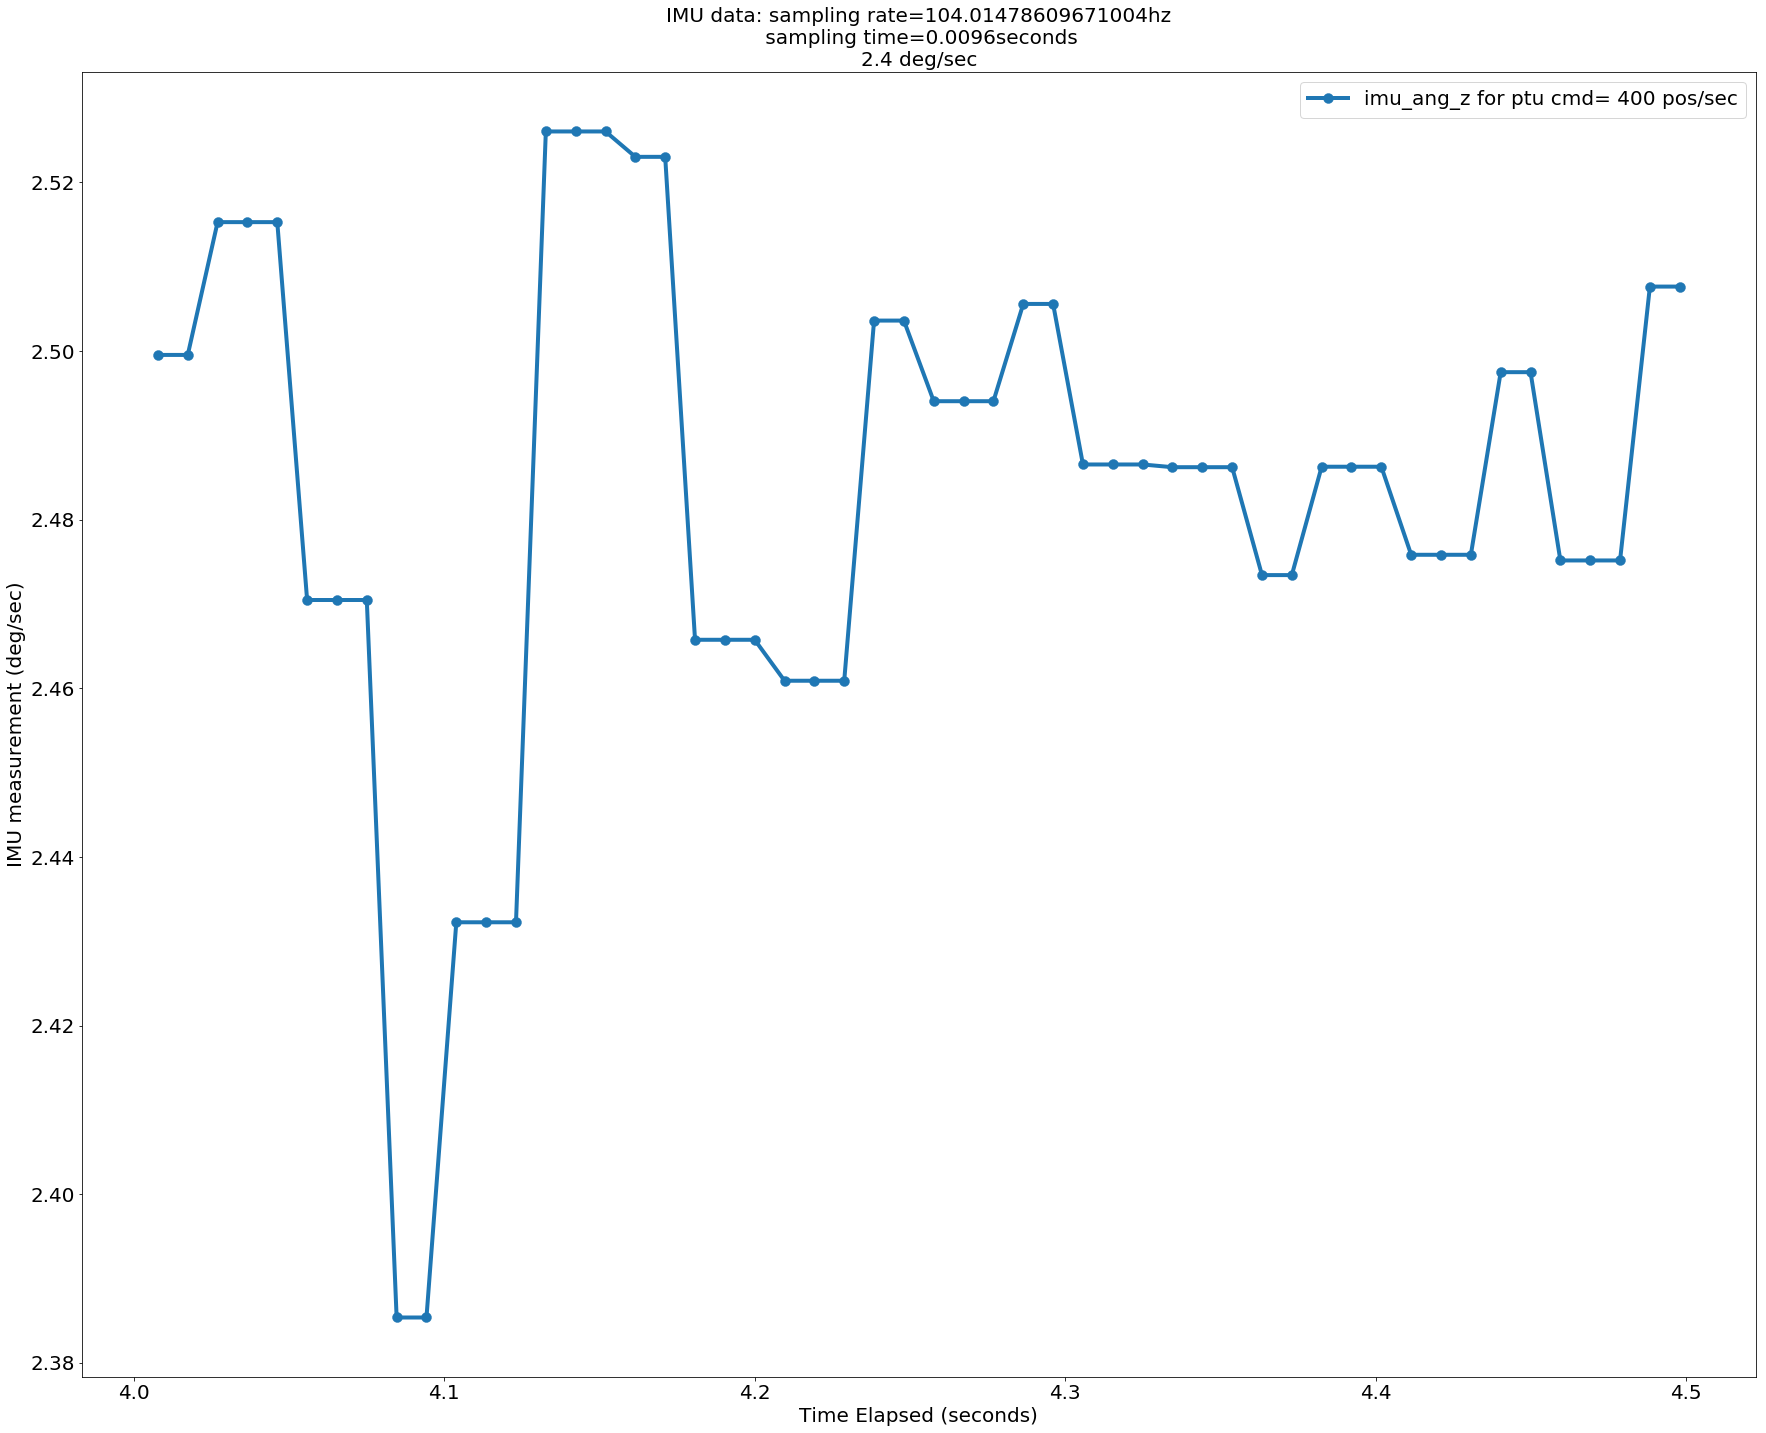

In [11]:
#Plot step response for PTU command=400 pos/sec (2.4 deg/sec)
plt.figure()
run='400'
x=data[run]['elapsed']
y=data[run]['imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(t1-t0,4))+'seconds\n'+str(data['deg_per_sec_cmd'][4])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')

#Plot step response for PTU command=10 pos/sec (0.06deg/sec)
plt.figure()
run='400'
mask = (data[run]['elapsed'] > 4) & (data[run]['elapsed'] < 4.5)
x=data[run].loc[mask,'elapsed']
y=data[run].loc[mask,'imu_ang_z']*imu2deg_sec
plt.plot(x,y,'-o',label='imu_ang_z for ptu cmd= '+str(run)+' pos/sec')
plt.title('IMU data: sampling rate='+str(hz)+'hz\n sampling time='+str(round(x.diff().mean(),4))+'seconds\n'+str(data['deg_per_sec_cmd'][4])+' deg/sec')
plt.legend()
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('IMU measurement (deg/sec)')